## Example - Decision Tree for the Titanic Dataset

Let's consider a decision tree example using the famous Titanic dataset. This dataset contains information about passengers on the Titanic, including whether they survived the tragic shipwreck. The objective is to predict survival based on various features like age, sex, passenger class, and more.


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Data Loading
The Titanic dataset contains information on passenger

In [4]:
# Load the Titanic dataset
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
X = titanic[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]  # Feature matrix
y = titanic["Survived"]  # Labels

# Data Preprocessing
Since the dataset contains missing values and categorical data, we preprocess it by filling missing values and converting categorical data to numeric values.

In [6]:
# Fill missing values and convert categorical data
X["Age"].fillna(X["Age"].median(), inplace=True)
X["Embarked"].fillna("S", inplace=True)
X["Sex"] = X["Sex"].map({"male": 0, "female": 1})
X["Embarked"] = X["Embarked"].map({"S": 0, "C": 1, "Q": 2})


C:\Users\Admin\AppData\Local\Temp\ipykernel_14000\1847274196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"].fillna(X["Age"].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14000\1847274196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"].fillna("S", inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14000\1847274196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

# Data Splitting
The dataset is split into a training set (70% of the data) and a testing set (30% of the data) to evaluate the model's performance.

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train the Decision Tree Model

In [8]:
# Train a decision tree classifier with a maximum depth of 3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

# Visualize the Decision Tree
We visualize the decision tree structure to understand how the model is making decisions. This visualization helps interpret the decision-making process.

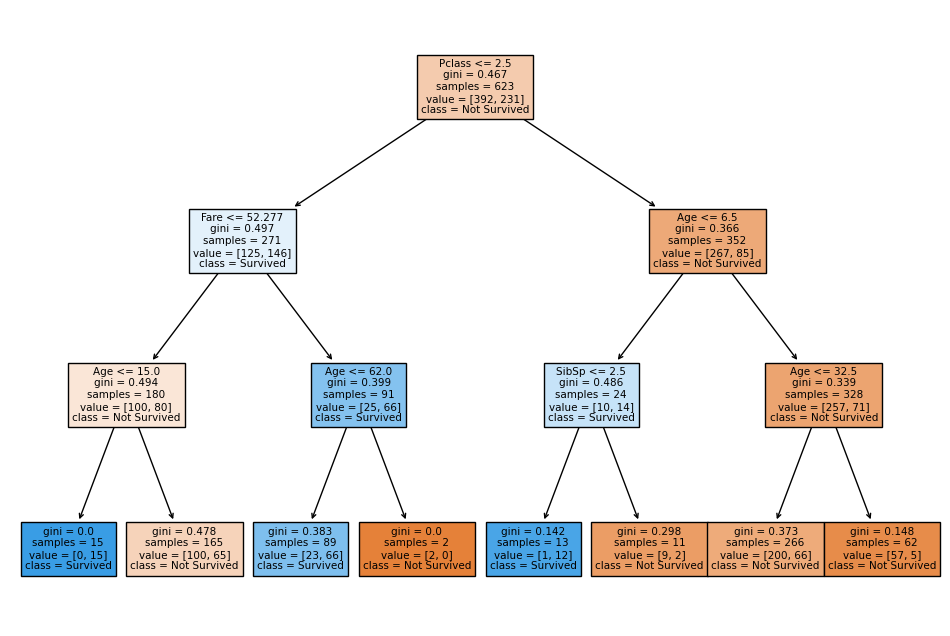

In [9]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"], 
               class_names=["Not Survived", "Survived"], filled=True)
plt.show()


# Evaluate the Model
The model is evaluated by predicting on the test dataset and assessing its accuracy, confusion matrix, and classification report.

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification report
class_report = classification_report(y_test, y_pred, target_names=["Not Survived", "Survived"])

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6940298507462687
Confusion Matrix:
 [[147  10]
 [ 72  39]]
Classification Report:
               precision    recall  f1-score   support

Not Survived       0.67      0.94      0.78       157
    Survived       0.80      0.35      0.49       111

    accuracy                           0.69       268
   macro avg       0.73      0.64      0.63       268
weighted avg       0.72      0.69      0.66       268



## Insights and Conclusions
# Model Bias: 
The confusion matrix and recall indicate that the model is biased towards predicting "Not Survived." This might be due to class imbalance in the training data or the decision tree's inherent structure.
# Imbalance Impact: 
Given the low recall for "Survived," the decision tree may not be handling imbalances in the dataset well. A lower recall suggests that many positive cases are going undetected, which is crucial when the goal is to predict survival.
# Overfitting Risk: 
Decision trees are prone to overfitting, especially if they grow too deep. However, with a depth of 3, this doesn't seem to be the main issue in this case. Still, overfitting can lead to poor generalization to new data, requiring techniques like pruning or ensemble methods to address this.